In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import odeint
from scipy import fftpack
from scipy import stats
from scipy.stats import gamma
from statsmodels.distributions.empirical_distribution import ECDF

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

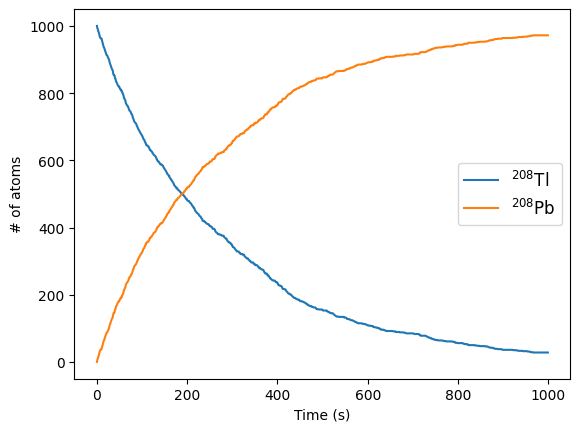

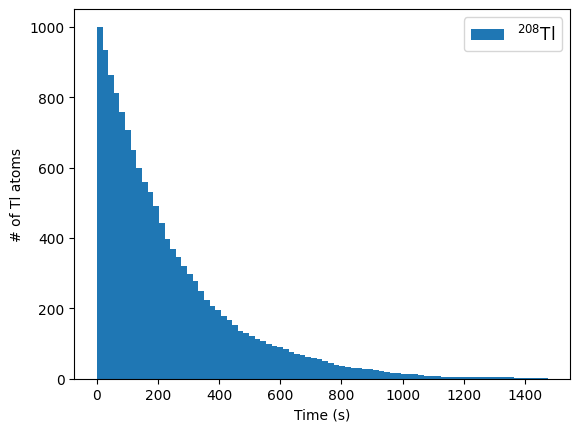

In [2]:
def decay_prob(t, tau=3.052*60):
    return 1-2**(-t/tau)
N=1000
Tl=np.array([N]) 
Pb=np.array([0])
t=0
for i in range(N-1):
    n_decayed = 0
    for j in range(Tl[i]):
        rand = np.random.random()
        if rand < decay_prob(1):
            n_decayed = n_decayed + 1
        else:
            continue
    Tl=np.append(Tl,Tl[i]-n_decayed)
    Pb=np.append(Pb,Pb[i]+n_decayed)

time=np.arange(0,N)
plt.plot(time, Tl, label='$^{208}$Tl')
plt.plot(time, Pb, label='$^{208}$Pb')
plt.xlabel('Time (s)')
plt.ylabel('# of atoms')
plt.legend(loc='best', fontsize=12)
plt.show()


def icdf(t, tau=3.052*60):
    return (-tau)*np.log2(1-t)
u=np.random.random(1000)
v=icdf(u)
plt.hist(v, bins=80, linewidth=2, label='$^{208}$Tl',cumulative = -1)

plt.xlabel('Time (s)')
plt.ylabel('# of Tl atoms')
plt.legend(loc='best', fontsize=12) 
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [3]:
true_val = 1.34691
print('The result obtained with Wolfram is: ',true_val)
print()

def f(x):
    return (np.sin(1/(1-x)))**2
    
    
N=100000
hit=0
a=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): 
        hit+=1
    a+=f(x)
    
I_1=2*hit/N
err_1 = abs(true_val-I_1)
print('Hit or Miss integral value: ',I_1)
print("Error with hit/miss method is: ",err_1)
print()

I_2= 2/N * a.sum()
err_2 = abs(true_val-I_2)
print()
print('Mean method integral value: ',I_2)
print("Error with mean value method is: ",err_2)

if err_1 < err_2:
    print("The hit/miss method has a smaller error")
elif err_1 > err_2:
    print("The mean value method has a smaller error")
else:
    print("The two errors are equal")

The result obtained with Wolfram is:  1.34691

Hit or Miss integral value:  1.3483
Error with hit/miss method is:  0.0013900000000000023


Mean method integral value:  1.3506356043829952
Error with mean value method is:  0.0037256043829951846
The hit/miss method has a smaller error


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
def f2(x):
    if np.sum(x**2) <= 1:
        return 1
    else:
        return 0

N = 100000
somma2 = 0
dim2 = 2

for i in range(N):
    x = np.random.uniform(-1,1,size=dim2)
    somma2 += f2(x)
    
I = 2*dim2/N*somma2
print('The correct area is: ', np.pi)
print('Monte Carlo result is:', I)

    
# ND CASE
def f10(x):
    if np.sum(x**2) <= 1:
        return 1
    else:
        return 0

dim10 = 10
somma10 = 0
for i in range(N):
    x = np.random.uniform(-1,1,size=dim10)
    somma10 += f10(x)
I = 2**dim10/N*somma10
print('Monte Carlo result is', I)

The correct area is:  3.141592653589793
Monte Carlo result is: 3.1394
Monte Carlo result is 2.43712


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [5]:
def w(x):
    return x**(-1/2)
    
def integral(x):
    return 2*x**(1/2)

def f(x):
    return w(x)/(np.e**x+1)
        

initial = 0
final = 1
N = 1000000
x = np.random.rand(N)

I = 1/N*np.sum(f(x)/w(x))*(integral(final)-integral(initial))
print('integral with importance sampling', I)

integral with importance sampling 0.7600575039378358
